# Illustrative example for AeroMAPS/LCA methodology

In [1]:
# Libraries import
import sys
import os
import os.path as pth
sys.path.insert(0, '../..')
    
from lcav.lca_problem import *
from lcav.helpers import *
from lcav.io.configuration import *
from lcav.gui.plots import *
import matplotlib.pyplot as plt 

# Pretty print for Sympy
from sympy import init_printing
init_printing()

# Paths
#os.chdir('./notebook')
DATA_FOLDER = './data'
CONFIGURATION_FILE = pth.join(DATA_FOLDER, 'configuration_methodo_ei391.yaml')

## 1) Setup parameterized LCA model

In [2]:
project, model, methods = LCAProblemConfigurator(CONFIGURATION_FILE).generate()

[WARNING] Db Foreground DB was here. Reseting it


Initial setup already done, skipping


[WARNING] [ParamRegistry] Param share_efuel was already defined in 'Foreground DB' : overriding.
[WARNING] Activity with name 'production' defined multiple times. Adding suffix increments to labels.


In [3]:
#problem = LCAProblemConfigurator(CONFIGURATION_FILE).get_problem()

In [4]:
agb.list_databases()

,backend,nb_activities,type
name,,,
ecoinvent-3.9.1-biosphere,sqlite,4718,biosphere
ecoinvent-3.9.1-cutoff,sqlite,21238,background
Foreground DB,sqlite,15,foreground


In [5]:
process_tree(model, foreground_only=True)

In [6]:
list_processes(model)

,activity,unit,location,level,database,parent,exchange
model,model,None,GLO,0,Foreground DB,,
aircraft_production,aircraft_production,unit,GLO,1,Foreground DB,model,n_aircraft/aircraft_lifetime
airports,airports,unit,GLO,1,Foreground DB,model,n_airports/airport_lifetime
energy,energy,kilowatt hour,GLO,1,Foreground DB,model,total_energy
kerosene,kerosene,None,GLO,2,Foreground DB,energy,(1 - share_efuel)/energy_density_kero
production [Europe without Switzerland],production [Europe without Switzerland],kilogram,Europe without Switzerland,3,Foreground DB,kerosene,1.00
combustion,combustion,None,GLO,3,Foreground DB,kerosene,1.00
chemicals,chemicals,None,GLO,4,Foreground DB,combustion,1.00
heavy_metals,heavy_metals,None,GLO,4,Foreground DB,combustion,1.00
efuel,efuel,kilowatt hour,GLO,2,Foreground DB,energy,share_efuel


In [7]:
agb.list_parameters()

group,name,label,default,min,max,std,distrib,unit,db
,aircraft_lifetime,aircraft lifetime,1.0,1,1,,linear,,Foreground DB
,airport_lifetime,airport lifetime,1.0,1,1,,linear,,Foreground DB
,amount_elec_h2,amount elec h2,1.0,1,1,,linear,,Foreground DB
,amount_h2,amount h2,1.0,1,1,,linear,,Foreground DB
,electricity_switch_param,electricity switch param,pv,,,,,,Foreground DB
,energy_density_h2,energy density h2,1.0,1,1,,linear,,Foreground DB
,energy_density_kero,energy density kero,1.0,1,1,,linear,,Foreground DB
,n_aircraft,n aircraft,1.0,1,1,,linear,,Foreground DB
,n_airports,n airports,1.0,1,1,,linear,,Foreground DB
,share_efuel,share efuel,1.0,1,1,,linear,,Foreground DB


## 2) LCIA

In [8]:
#import IPython.display as disp

#for i, expr in enumerate(problem.lambdas):
#    print(problem.methods[i])
#    disp.display(expr)

In [8]:
agb.compute_impacts(
    model,
    methods,
    
    functional_unit = 1.03e13,  # divide impacts by this value
    axis = 'phase',
    
    n_aircraft = 25000,
    aircraft_lifetime = 25,
    n_airports = 0,
    airport_lifetime = 100,
    total_energy = 3e12, # kWh
    energy_density_kero = 11.99, # kWh/kg
    share_efuel = 0.0,
    amount_elec_h2 = 2, # kWh of elec to produce 1 kWh of efuel
    amount_h2 = 1, # kg of h2 to produce 1 kg of efuel,
    energy_density_h2 = 33.6,
    electricity_switch_param = 'pv'
    # ... default values will be set for parameters not provided by the user
)

[INFO] Db changed recently, clearing cache expr


,acidification - accumulated exceedance (AE)[mol H+-Eq],climate change - global warming potential (GWP100)[kg CO2-Eq],water use - user deprivation potential (deprivation-weighted water consumption)[m3 world eq. deprived],land use - soil quality index[dimensionless]
phase,,,,
_other_,0,0,0,0
aircraft_production,4.90236e-06,0.000764381,0.000148438,0
airport,0,0,0,0.00253496
combustion,0.000281549,0.0773928,0.00128331,0
kerosene_production,9.4617e-05,0.0208939,0.0016474,0.0674038
*sum*,0.000381069,0.0990511,0.00307915,0.0699387


In [10]:
# reset parameters distributions
#for param in lcalg.params._param_registry().all():
#    param.distrib = 'linear'

In [11]:
# Multiple runs for a list of values (e.g., one value per year)
parameters = dict(
    n_aircraft = 25000,
    aircraft_lifetime = 25,
    n_airports = 0,
    airport_lifetime = 100,
    total_energy = 3e12, # kWh
    energy_density_kero = 11.99, # kWh/kg
    share_efuel = [0.0, 0.1, 0.2, 0.3, 0.5],
    amount_elec_h2 = [2, 1.8, 1.7, 1.3, 1.0], # kWh of elec to produce 1 kWh of efuel
    amount_h2 = [1, 0.9, 0.7, 0.6, 0.5], # kg of h2 to produce 1 kg of efuel,
    energy_density_h2 = 33.6,
    electricity_switch_param = 'pv'
)

df = agb.compute_impacts(
    model,
    methods,
    
    functional_unit = 1.03e13,  # divide impacts by this value
    #axis = 'phase',
    return_params=False,

    **parameters
)
df

[INFO] Db changed recently, clearing cache expr


,acidification - accumulated exceedance (AE)[mol H+-Eq],climate change - global warming potential (GWP100)[kg CO2-Eq],water use - user deprivation potential (deprivation-weighted water consumption)[m3 world eq. deprived],land use - soil quality index[dimensionless]
share_efuel,,,,
0,0.000381069,0.0990511,0.00307915,0.0699387
0.1,0.000381629,0.104242,0.0102073,0.784144
0.2,0.000382189,0.109432,0.0173354,1.49835
0.3,0.000382749,0.114623,0.0244635,2.21255
0.5,0.000383869,0.125004,0.0387197,3.64096


In [19]:
df.index

MultiIndex([(0.0, 2.0, 1.0),
            (0.1, 1.8, 0.9),
            (0.2, 1.7, 0.7),
            (0.3, 1.3, 0.6),
            (0.5, 1.0, 0.5)],
           names=['share_efuel', 'amount_elec_h2', 'amount_h2'])

In [20]:
for col in df.columns:
    print(df.loc[:,col].values)

[0.00038107 0.00037781 0.00036864 0.00034162 0.00028843]
[0.09905107 0.10273975 0.10186746 0.09732314 0.08745593]
[0.00307915 0.00946514 0.01502265 0.01662805 0.02016673]
[0.06993872 0.71204905 1.28112373 1.45509023 1.83859992]


In [14]:
agb.lca._modelToExpr(problem.model, problem.methods)

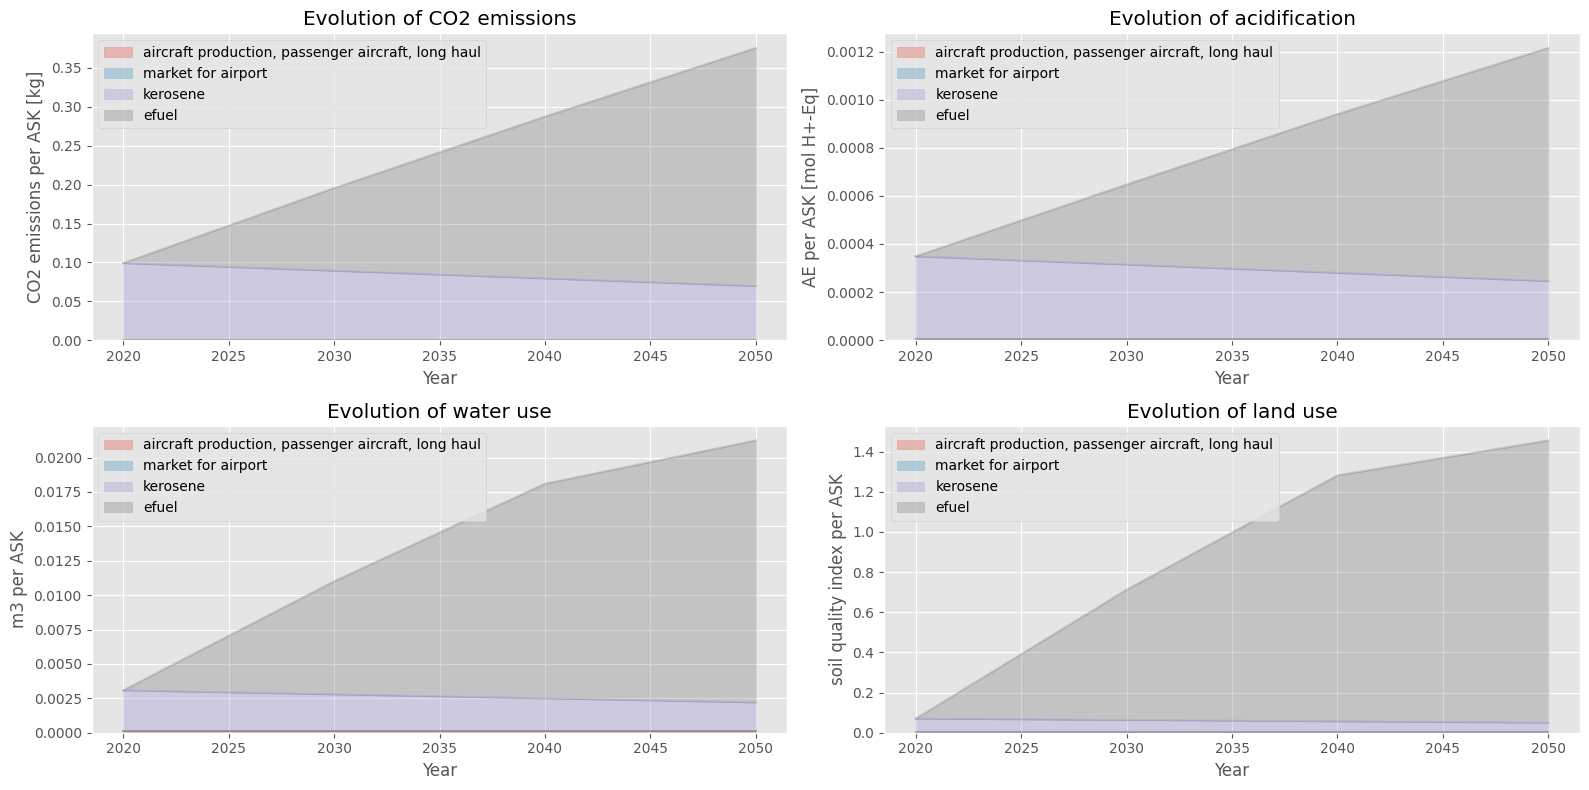

In [25]:
# Plot evolution
plt.style.use('ggplot')
fig, axs = plt.subplots(2,2, figsize=(16,8))

years_list = [2020, 2030, 2040, 2050]
df_climate = pd.DataFrame({'years': years_list})
df_acid = pd.DataFrame({'years': years_list})
df_water = pd.DataFrame({'years': years_list})
df_land = pd.DataFrame({'years': years_list})

#model = [exc.input for exc in problem.model.technosphere()]
#activities = [exc.input for exc in model[0].technosphere()]

aircraft_prod = lcalg.findActivity(name='aircraft production, passenger aircraft, long haul', db_name='ecoinvent 3.9_cutoff_ecoSpold02')
airport = lcalg.findActivity(name='market for airport', db_name='ecoinvent 3.9_cutoff_ecoSpold02')
kerosene = lcalg.findActivity(name='kerosene', db_name='Foreground DB')
efuel = lcalg.findActivity(name='efuel', db_name='Foreground DB')

sub_processes = [aircraft_prod, airport, kerosene, efuel]

for act in sub_processes:
    res = problem.compute_lcia(
        extract_activities=[act],
        **parameters
    )
    df_climate[act.as_dict()['name']] = res['climate change - global warming potential (GWP100)[kg CO2-Eq]']
    df_acid[act.as_dict()['name']] = res['acidification - accumulated exceedance (AE)[mol H+-Eq]']
    df_water[act.as_dict()['name']] = res['water use - user deprivation potential (deprivation-weighted water consumption)[m3 world eq. deprived]']
    df_land[act.as_dict()['name']] = res['land use - soil quality index[dimensionless]']

df_climate.set_index('years', inplace=True)
df_climate.plot(ax=axs[0][0], kind='area', alpha=0.3, stacked=True)
axs[0][0].set_title('Evolution of CO2 emissions');
axs[0][0].set_ylabel('CO2 emissions per ASK [kg]');
axs[0][0].set_xlabel('Year');

df_acid.set_index('years', inplace=True)
df_acid.plot(ax=axs[0][1], kind='area', alpha=0.3, stacked=True)
axs[0][1].set_title('Evolution of acidification');
axs[0][1].set_ylabel('AE per ASK [mol H+-Eq]');
axs[0][1].set_xlabel('Year');

df_water.set_index('years', inplace=True)
df_water.plot(ax=axs[1][0], kind='area', alpha=0.3, stacked=True)
axs[1][0].set_title('Evolution of water use');
axs[1][0].set_ylabel('m3 per ASK');
axs[1][0].set_xlabel('Year');

df_land.set_index('years', inplace=True)
df_land.plot(ax=axs[1][1], kind='area', alpha=0.3, stacked=True)
axs[1][1].set_title('Evolution of land use');
axs[1][1].set_ylabel('soil quality index per ASK');
axs[1][1].set_xlabel('Year');

plt.tight_layout()

## 3) Global sensitivity analysis

In [125]:
#problem.list_parameters()

In [26]:
# Set parameters 
ask = problem.get_parameter('ASK')
ask.distrib = "fixed"  # Fixed value, not considered as a variable input for monte carlo simulation
ask.default = 1.03e13

aircraft_lifetime = problem.get_parameter('aircraft_lifetime')
aircraft_lifetime.distrib = "normal"  # Normal distribution, centered on *default* value (mean), with deviation of *std* and truncated between *min* and *max*
aircraft_lifetime.default = 25
aircraft_lifetime.std = 5
aircraft_lifetime.min = 15
aircraft_lifetime.max = 35

#airport_lifetime = problem.get_parameter('airport_lifetime')
#airport_lifetime.distrib = "lognormal"  # Lognormal distribution, centered on *default* value (mean), with deviation of *std*, not truncated
#airport_lifetime_avg = 70; airport_lifetime_std = 50;
#airport_lifetime.default = np.log(airport_lifetime_avg)
#airport_lifetime.std = np.log(1+(airport_lifetime_std/airport_lifetime_avg)**2)**.5 # careful, std for a lognormal distribution is actually the lognormal of the std

airport_lifetime = problem.get_parameter('airport_lifetime')
airport_lifetime.distrib = "normal" 
airport_lifetime.default = 100
airport_lifetime.std = 10
airport_lifetime.min = 50
airport_lifetime.max = 150

amount_elec_h2 = problem.get_parameter('amount_elec_h2')
amount_elec_h2.distrib = "triangle"  # Triangle distribution between *min* and *max* (set to zero probability), with highest probability at *default* value
amount_elec_h2.default = 2.0
amount_elec_h2.min = 1.0
amount_elec_h2.max = 3.0

amount_h2 = problem.get_parameter('amount_h2')
amount_h2.distrib = "triangle"  # Triangle distribution between *min* and *max* (set to zero probability), with highest probability at *default* value
amount_h2.default = 1.0
amount_h2.min = 0.5
amount_h2.max = 2.0

energy_density_h2 = problem.get_parameter('energy_density_h2')
# default distribution is 'linear': Uniform distribution between *min* and *max*
# energy_density_h2.distrib = "linear"
energy_density_h2.default = 33.6
energy_density_h2.min = 30.0
energy_density_h2.max = 35.0

energy_density_kero = problem.get_parameter('energy_density_kero')
energy_density_kero.distrib = "fixed"
energy_density_kero.default = 11.99

n_aircraft = problem.get_parameter('n_aircraft')
n_aircraft.distrib = 'fixed'
n_aircraft.default = 25000  

n_airports = problem.get_parameter('n_airports')
n_airports.distrib = 'fixed'
n_airports.default = 0 #1000

share_efuel = problem.get_parameter('share_efuel')
share_efuel.distrib = "triangle"  # Triangle distribution between *min* and *max* (set to zero probability), with highest probability at *default* value
share_efuel.default = 0.15
share_efuel.min = 0.0
share_efuel.max = 0.6

total_energy = problem.get_parameter('total_energy')
total_energy.distrib = 'fixed'
total_energy.default = 3e12

electricity_switch_param = problem.get_parameter('electricity_switch_param')
electricity_switch_param.distrib = 'fixed'
electricity_switch_param.weights = {'pv': 0.8, 'wind': 0.2} # statistical weights for each value
electricity_switch_param.sum = sum(electricity_switch_param.weights.values())
# Or fix the elec mix
#electricity_switch_param.distrib = 'fixed'
#electricity_switch_param.default = 'pv'

In [27]:
problem.list_parameters()

group,name,label,default,min,max,std,distrib,unit,db
,ASK,ASK,10300000000000.0,1,1,,fixed,,Foreground DB
,aircraft_lifetime,aircraft lifetime,25,15,35,5,normal,,Foreground DB
,airport_lifetime,airport lifetime,100,50,150,10,normal,,Foreground DB
,amount_elec_h2,amount elec h2,2.0,1,3,,triangle,,Foreground DB
,amount_h2,amount h2,1.0,0.5,2,,triangle,,Foreground DB
,electricity_switch_param,electricity switch param,pv,,,,fixed,,Foreground DB
,energy_density_h2,energy density h2,33.6,30,35,,linear,,Foreground DB
,energy_density_kero,energy density kero,11.99,1,1,,fixed,,Foreground DB
,n_aircraft,n aircraft,25000,1,1,,fixed,,Foreground DB
,n_airports,n airports,0,1,1,,fixed,,Foreground DB


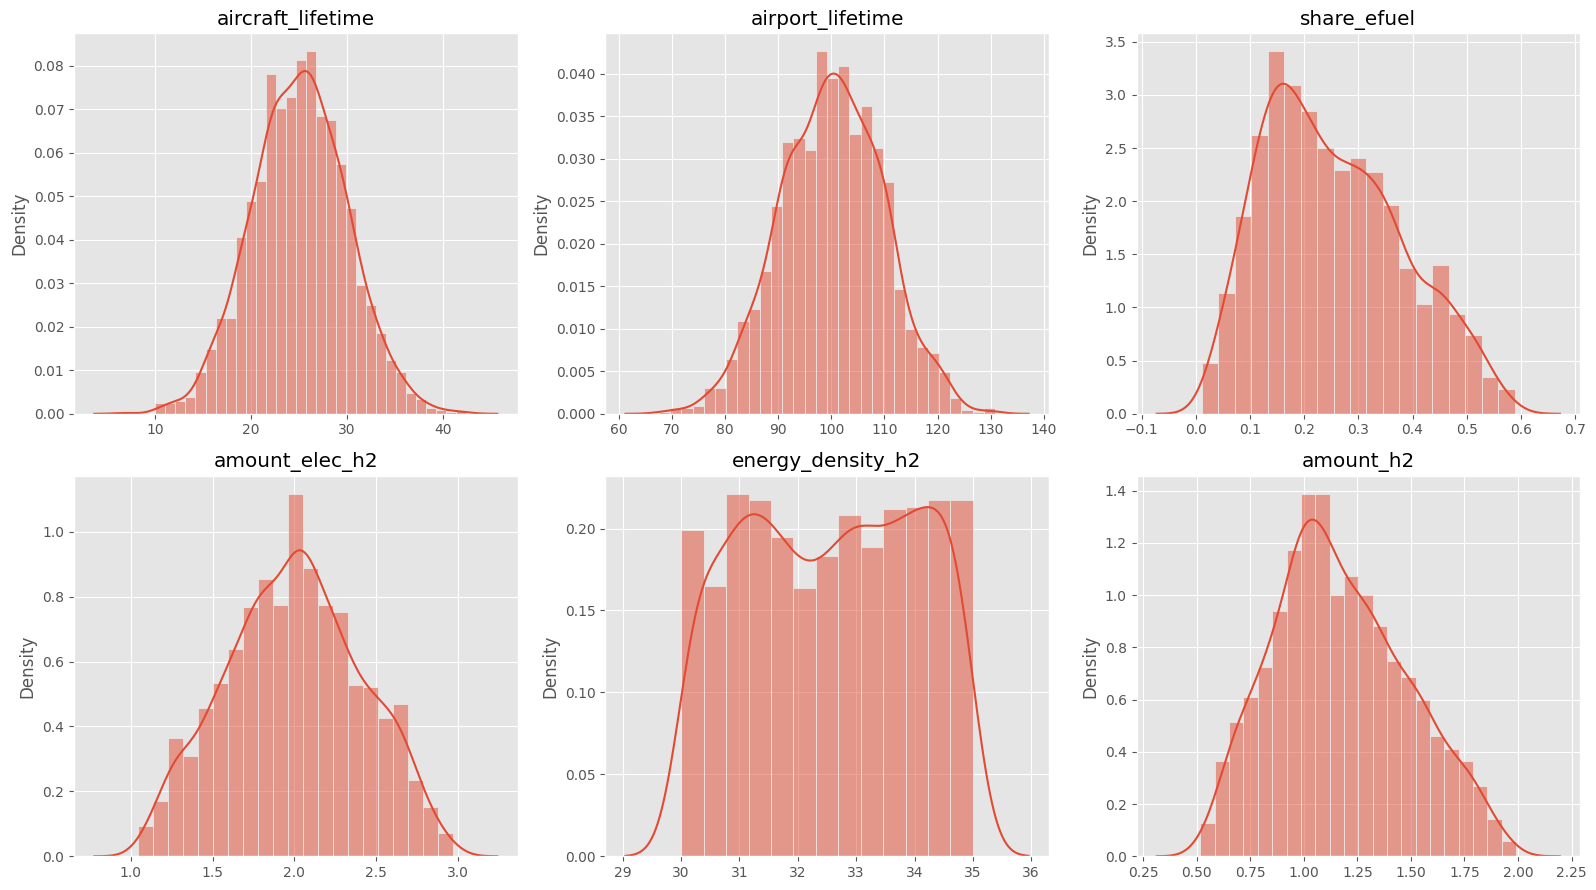

In [28]:
from lcav.notebook.utils import utils
#import seaborn as sns

#utils._plot_params([amount_elec_h2,amount_h2, airport_lifetime, aircraft_lifetime], figsize=(8,4), size=1000)
#utils._plot_params([amount_elec_h2,amount_h2, airport_lifetime, aircraft_lifetime, electricity_switch_param], figsize=(8,4), size=1000)
utils._plot_params([p for p in lcalg.params._param_registry().all() if p.distrib in ['linear', 'triangle', 'lognormal', 'normal']], columns=3, size=2000, figsize=(16,9))

In [29]:
#lcalg.oat_matrix(problem.model, problem.methods)

Generating samples ...


D:\Softwares\miniconda3\envs\LCAv\lib\site-packages\SALib\sample\saltelli.py:109: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (10000) is equal to `2^n`.
        
  warnings.warn(msg)


Transforming samples ...


Param 'n_aircraft' is marked as FIXED, but passed in parameters : ignored
Param 'n_airports' is marked as FIXED, but passed in parameters : ignored
Param 'total_energy' is marked as FIXED, but passed in parameters : ignored
Param 'energy_density_kero' is marked as FIXED, but passed in parameters : ignored
Param 'electricity_switch_param' is marked as FIXED, but passed in parameters : ignored
Param 'ASK' is marked as FIXED, but passed in parameters : ignored


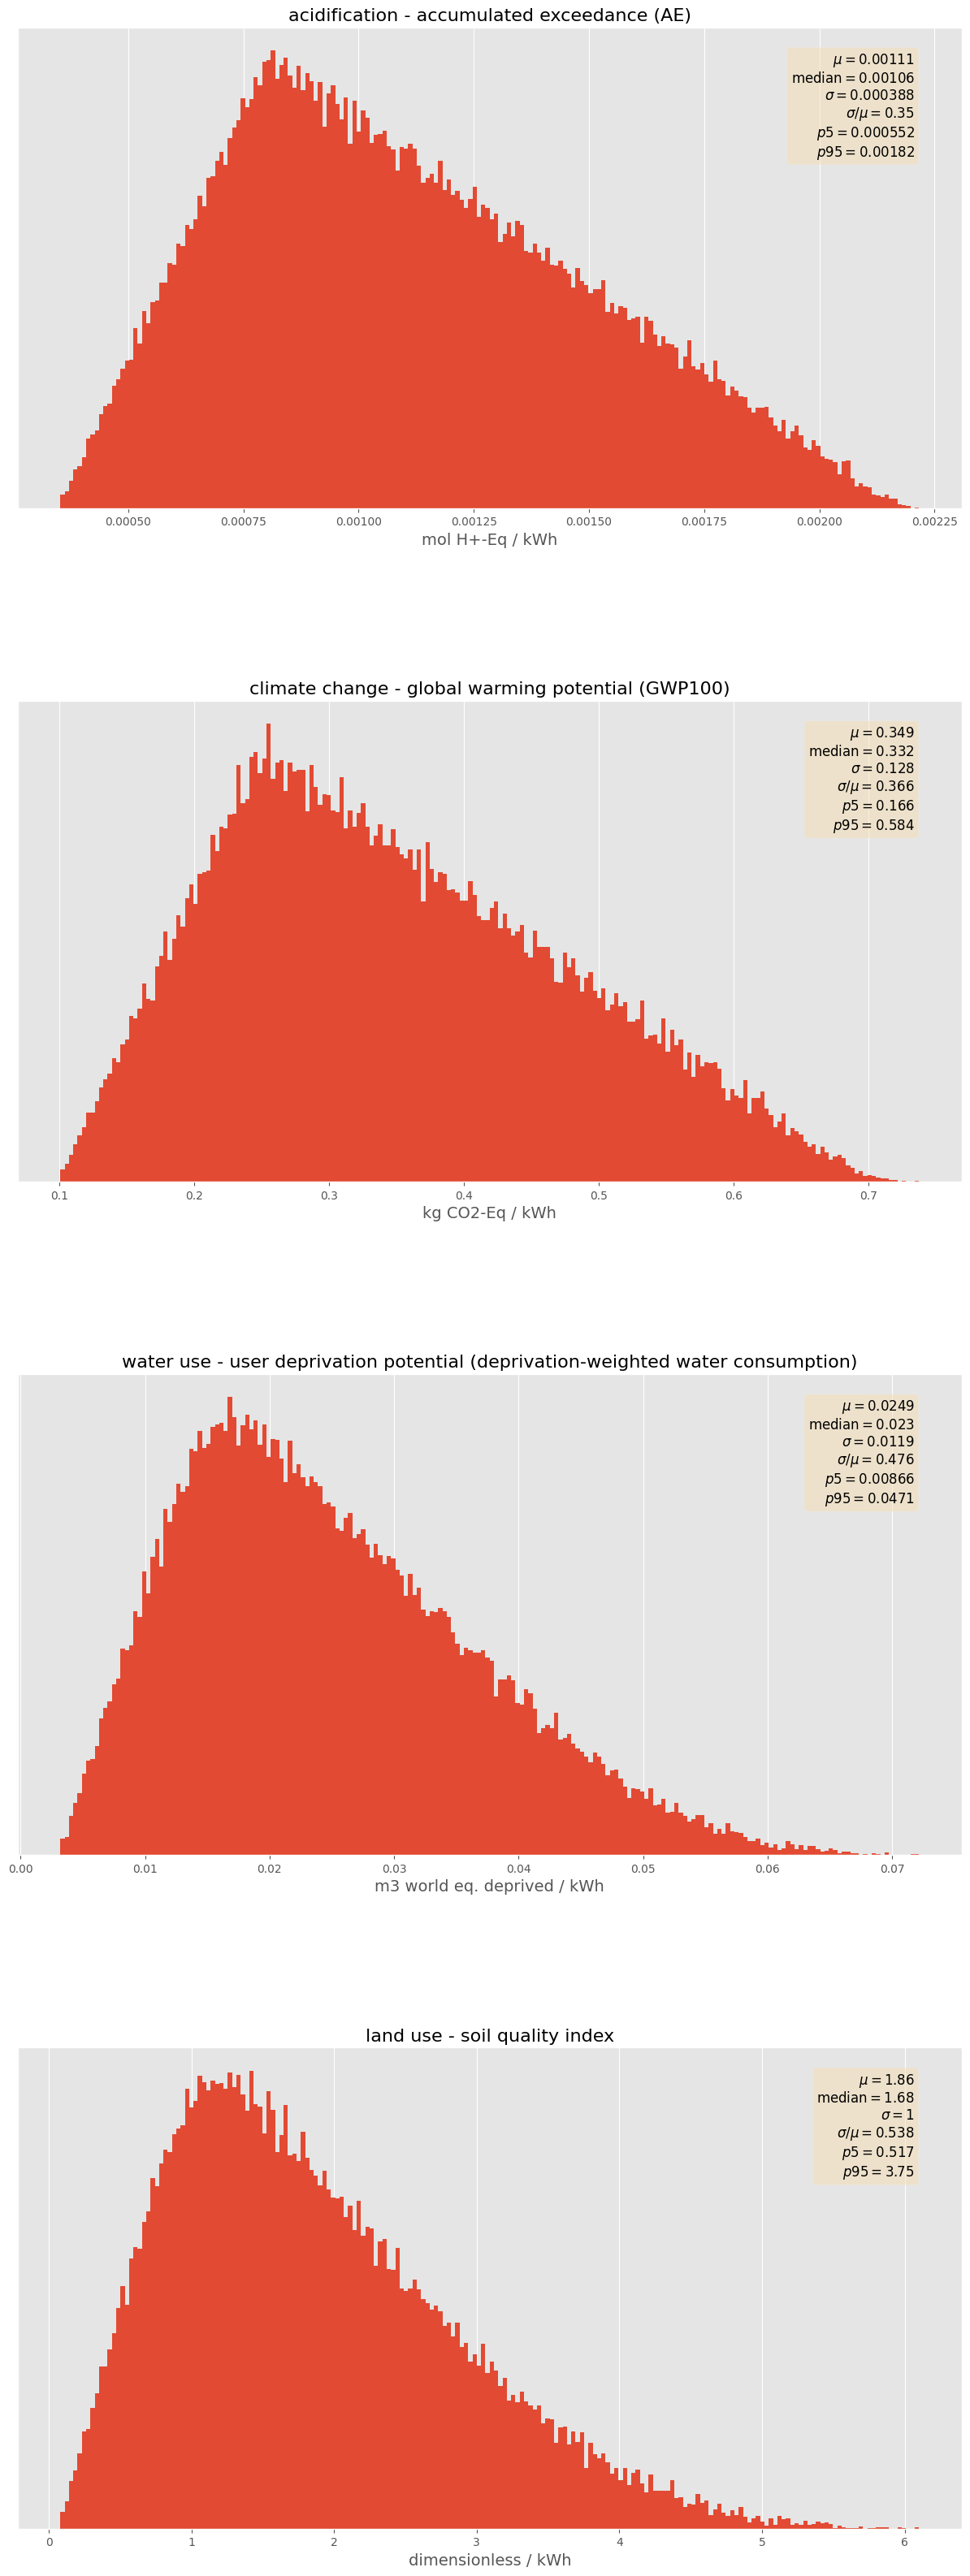

In [30]:
res = lcalg.distrib(problem.model, problem.methods)

In [32]:
lcalg.incer_stochastic_matrix(problem.model, problem.methods)

Generating samples ...
Transforming samples ...


D:\Softwares\miniconda3\envs\LCAv\lib\site-packages\SALib\sample\saltelli.py:109: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (1000) is equal to `2^n`.
        
  warnings.warn(msg)


Processing Sobol indices ...
Processing sobol for ('EF v3.1', 'acidification', 'accumulated exceedance (AE)')
Processing sobol for ('EF v3.1', 'climate change', 'global warming potential (GWP100)')
Processing sobol for ('EF v3.1', 'water use', 'user deprivation potential (deprivation-weighted water consumption)')
Processing sobol for ('EF v3.1', 'land use', 'soil quality index')


interactive(children=(Dropdown(description='indice', options=('s1', 'st'), value='s1'), Dropdown(description='…